In [ ]:
import pandas as pd
import pickle #LabelEncoder
import joblib #Scaler
import sys

In [ ]:
import os
import random as rn
import tensorflow
import numpy as np

SEED = 12340
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
tensorflow.random.set_seed(SEED)
rn.seed(SEED)

In [ ]:
df = pd.read_csv(r'cic_ids_2018.csv')
df.head()   

,Unnamed: 0,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,3389,1665875,8,7,1128,1581.0,661,0,141.00,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,53,67765,2,2,94,268.0,47,47,47.00,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,0,213190,5,0,0,0.0,0,0,0.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,41967,86370853,2,0,0,0.0,0,0,0.00,...,20,0.0,0.0,0.0,0.0,86400000.0,0.0,86400000.0,86400000.0,Benign
4,4,80,5113386,4,4,97,231.0,97,0,24.25,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246730 entries, 0 to 246729
Data columns (total 74 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         246730 non-null  int64  
 1   Dst Port           246730 non-null  int64  
 2   Flow Duration      246730 non-null  int64  
 3   Tot Fwd Pkts       246730 non-null  int64  
 4   Tot Bwd Pkts       246730 non-null  int64  
 5   TotLen Fwd Pkts    246730 non-null  int64  
 6   TotLen Bwd Pkts    246730 non-null  float64
 7   Fwd Pkt Len Max    246730 non-null  int64  
 8   Fwd Pkt Len Min    246730 non-null  int64  
 9   Fwd Pkt Len Mean   246730 non-null  float64
 10  Fwd Pkt Len Std    246730 non-null  float64
 11  Bwd Pkt Len Max    246730 non-null  int64  
 12  Bwd Pkt Len Min    246730 non-null  int64  
 13  Bwd Pkt Len Mean   246730 non-null  float64
 14  Bwd Pkt Len Std    246730 non-null  float64
 15  Flow IAT Mean      246730 non-null  float64
 16  Fl

In [ ]:
'''from pandas_profiling import profile_report
profile_report.ProfileReport(df, title='Pandas Profiling Report for CIC IDS 2018 Dataset', 
                             minimal=True, 
                             vars={"num": {"low_categorical_threshold": 0}}).to_file("Report.html")'''

In [ ]:
df.columns

Index(['Unnamed: 0', 'Dst Port', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg

In [ ]:
all_cols = df.columns.values.tolist()
rem_lst = []
x = 0
v1, v2, v3, v4 = "Min", "Max", "Var", "Std"
for i in all_cols:
    if v1 in i or v2 in i or v3 in i or v4 in i:
        x+=1
        rem_lst.append(i)
print(len(rem_lst), x)

26 26


In [ ]:
rem_lst

['Fwd Pkt Len Max',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Std',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Pkt Len Min',
 'Pkt Len Max',
 'Pkt Len Std',
 'Pkt Len Var',
 'Fwd Seg Size Min',
 'Active Std',
 'Active Max',
 'Active Min',
 'Idle Std',
 'Idle Max',
 'Idle Min']

In [ ]:
new_cols = []
for i in all_cols:
    if i in rem_lst:
        pass
    else:
        new_cols.append(i)
len(new_cols)

48

In [ ]:
len(df.columns)

74

In [ ]:
len(rem_lst)

26

In [ ]:
new_cols

['Unnamed: 0',
 'Dst Port',
 'Flow Duration',
 'Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Fwd Pkt Len Mean',
 'Bwd Pkt Len Mean',
 'Flow IAT Mean',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Bwd IAT Tot',
 'Bwd IAT Mean',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Len',
 'Bwd Header Len',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Mean',
 'FIN Flag Cnt',
 'SYN Flag Cnt',
 'RST Flag Cnt',
 'ACK Flag Cnt',
 'URG Flag Cnt',
 'CWE Flag Count',
 'ECE Flag Cnt',
 'Pkt Size Avg',
 'Fwd Seg Size Avg',
 'Bwd Seg Size Avg',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Fwd Blk Rate Avg',
 'Bwd Byts/b Avg',
 'Bwd Pkts/b Avg',
 'Bwd Blk Rate Avg',
 'Subflow Fwd Pkts',
 'Subflow Fwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Bwd Byts',
 'Init Bwd Win Byts',
 'Fwd Act Data Pkts',
 'Active Mean',
 'Idle Mean',
 'Label']

In [ ]:
redund_cols = ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg', 
 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg']
len(redund_cols)

9

In [ ]:
fin_cols = []
for i in new_cols:
    if i in redund_cols:
        pass
    else:
        fin_cols.append(i)
len(fin_cols)

39

In [ ]:
fin_cols

['Unnamed: 0',
 'Dst Port',
 'Flow Duration',
 'Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Fwd Pkt Len Mean',
 'Bwd Pkt Len Mean',
 'Flow IAT Mean',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Bwd IAT Tot',
 'Bwd IAT Mean',
 'Fwd PSH Flags',
 'Fwd Header Len',
 'Bwd Header Len',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Mean',
 'FIN Flag Cnt',
 'SYN Flag Cnt',
 'RST Flag Cnt',
 'ACK Flag Cnt',
 'URG Flag Cnt',
 'CWE Flag Count',
 'ECE Flag Cnt',
 'Pkt Size Avg',
 'Fwd Seg Size Avg',
 'Bwd Seg Size Avg',
 'Subflow Fwd Pkts',
 'Subflow Fwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Bwd Byts',
 'Init Bwd Win Byts',
 'Fwd Act Data Pkts',
 'Active Mean',
 'Idle Mean',
 'Label']

In [ ]:
data = df[fin_cols]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246730 entries, 0 to 246729
Data columns (total 39 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         246730 non-null  int64  
 1   Dst Port           246730 non-null  int64  
 2   Flow Duration      246730 non-null  int64  
 3   Tot Fwd Pkts       246730 non-null  int64  
 4   Tot Bwd Pkts       246730 non-null  int64  
 5   TotLen Fwd Pkts    246730 non-null  int64  
 6   TotLen Bwd Pkts    246730 non-null  float64
 7   Fwd Pkt Len Mean   246730 non-null  float64
 8   Bwd Pkt Len Mean   246730 non-null  float64
 9   Flow IAT Mean      246730 non-null  float64
 10  Fwd IAT Tot        246730 non-null  float64
 11  Fwd IAT Mean       246730 non-null  float64
 12  Bwd IAT Tot        246730 non-null  float64
 13  Bwd IAT Mean       246730 non-null  float64
 14  Fwd PSH Flags      246730 non-null  int64  
 15  Fwd Header Len     246730 non-null  int64  
 16  Bw

In [ ]:
'''import sweetviz 
my_report = sweetviz.analyze(data)
my_report.show_html('IDS_EDA_Report.html')'''

In [ ]:
data.columns

Index(['Unnamed: 0', 'Dst Port', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts',
       'Fwd Pkt Len Mean', 'Bwd Pkt Len Mean', 'Flow IAT Mean', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Fwd PSH Flags',
       'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s',
       'Pkt Len Mean', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt',
       'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts',
       'Subflow Bwd Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Active Mean', 'Idle Mean', 'Label'],
      dtype='object')

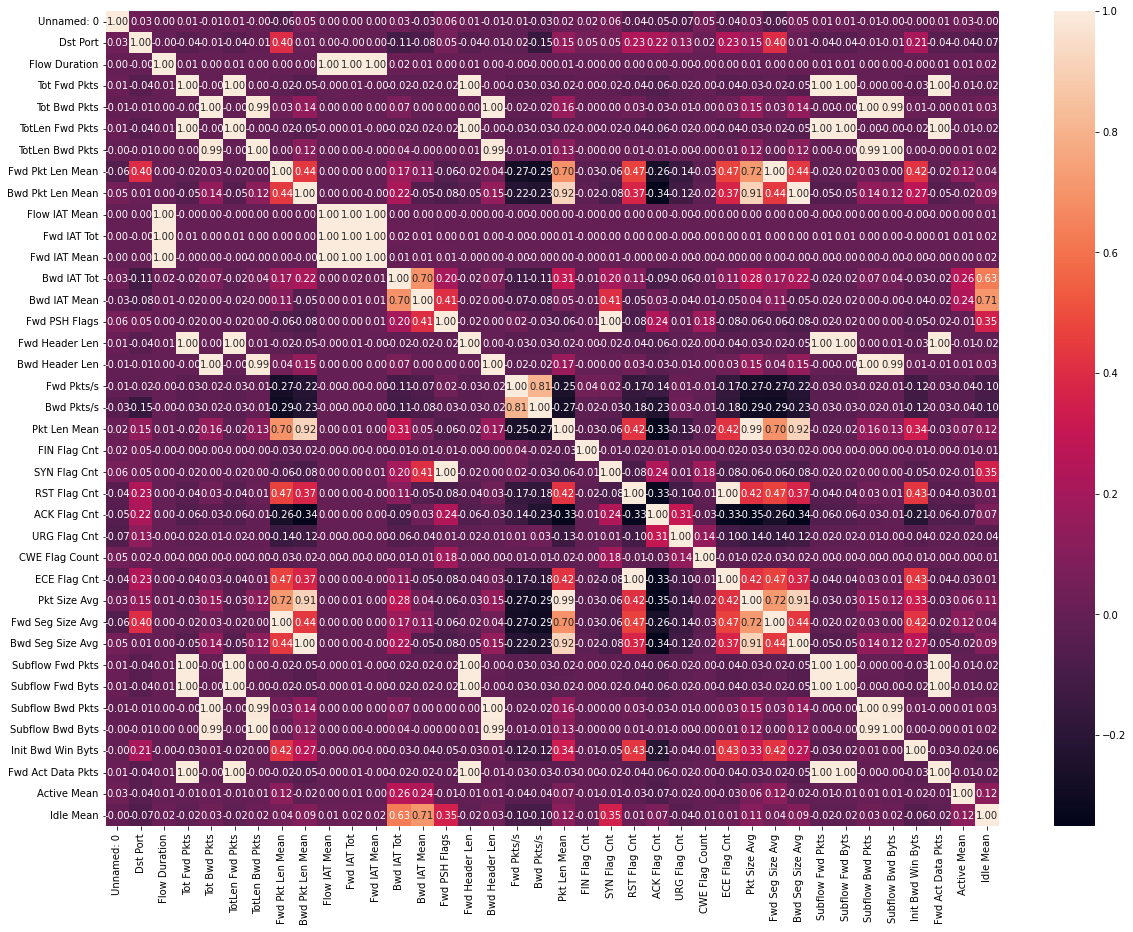

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

In [ ]:
data = data.drop(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Fwd Header Len',
                  'Bwd Header Len', 'Flow IAT Mean', 'Fwd IAT Mean', 
                  'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Fwd Act Data Pkts',
                  'Fwd Seg Size Avg', 'Pkt Size Avg', 'Bwd Seg Size Avg', 'Pkt Len Mean', 'Fwd PSH Flags', 'ECE Flag Cnt'], axis = 1)

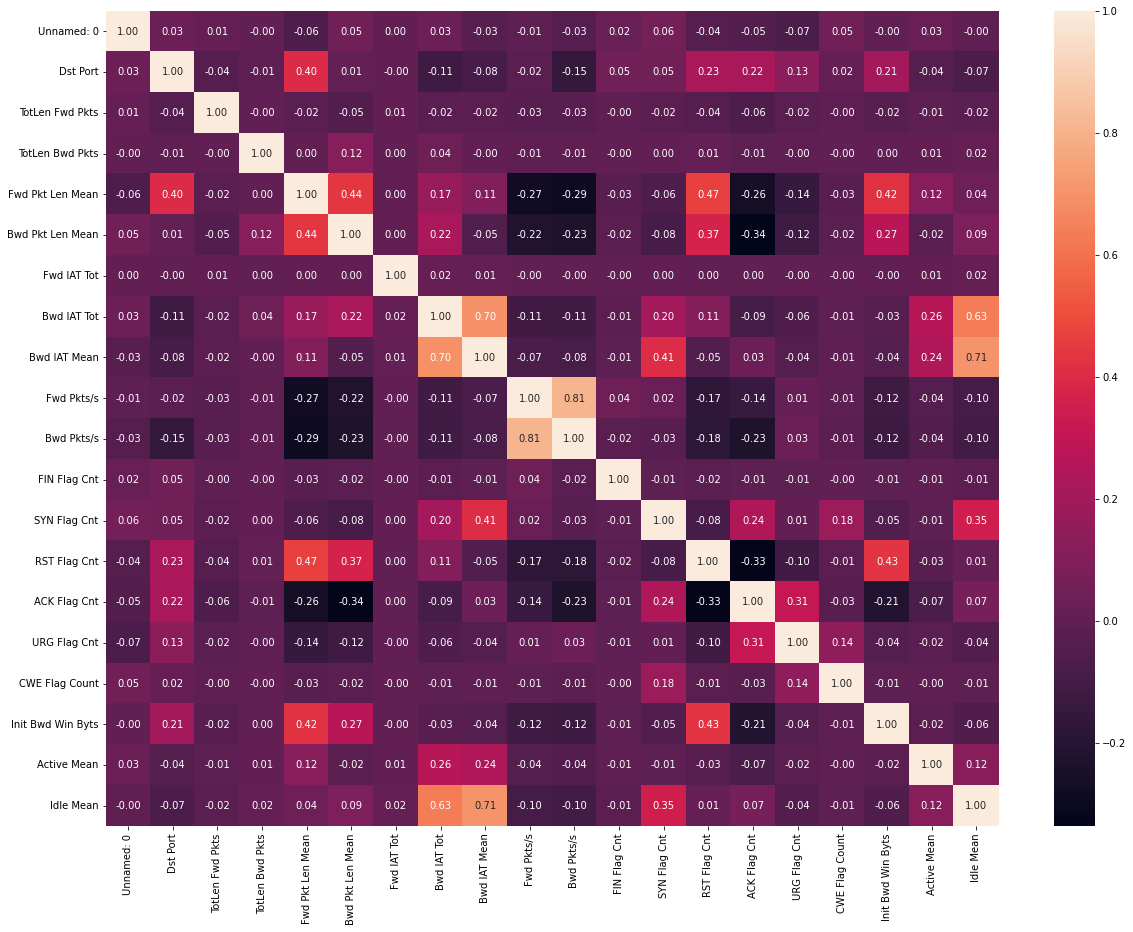

In [ ]:

plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

In [ ]:
data.columns

Index(['Unnamed: 0', 'Dst Port', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts',
       'Fwd Pkt Len Mean', 'Bwd Pkt Len Mean', 'Fwd IAT Tot', 'Bwd IAT Tot',
       'Bwd IAT Mean', 'Fwd Pkts/s', 'Bwd Pkts/s', 'FIN Flag Cnt',
       'SYN Flag Cnt', 'RST Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'Init Bwd Win Byts', 'Active Mean', 'Idle Mean',
       'Label'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246730 entries, 0 to 246729
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         246730 non-null  int64  
 1   Dst Port           246730 non-null  int64  
 2   TotLen Fwd Pkts    246730 non-null  int64  
 3   TotLen Bwd Pkts    246730 non-null  float64
 4   Fwd Pkt Len Mean   246730 non-null  float64
 5   Bwd Pkt Len Mean   246730 non-null  float64
 6   Fwd IAT Tot        246730 non-null  float64
 7   Bwd IAT Tot        246730 non-null  float64
 8   Bwd IAT Mean       246730 non-null  float64
 9   Fwd Pkts/s         246730 non-null  float64
 10  Bwd Pkts/s         246730 non-null  float64
 11  FIN Flag Cnt       246730 non-null  int64  
 12  SYN Flag Cnt       246730 non-null  int64  
 13  RST Flag Cnt       246730 non-null  int64  
 14  ACK Flag Cnt       246730 non-null  int64  
 15  URG Flag Cnt       246730 non-null  int64  
 16  CW

In [ ]:
data['Label'].unique()

array(['Benign', 'Bot', 'FTP-BruteForce', 'SSH-Bruteforce',
       'DoS attacks-GoldenEye', 'DoS attacks-Slowloris',
       'DDOS attack-HOIC', 'DDOS attack-LOIC-UDP', 'DoS attacks-Hulk',
       'DoS attacks-SlowHTTPTest', 'Infilteration'], dtype=object)

In [ ]:
len(data['Label'].unique())

11

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoder = le.fit(data['Label'])
pickle.dump(encoder, open("label_enc.pkl", 'wb'))

In [ ]:
file = open("label_enc.pkl","rb")
lab_enc = pickle.load(file)
data['Label'] = lab_enc.transform(data['Label'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246730 entries, 0 to 246729
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         246730 non-null  int64  
 1   Dst Port           246730 non-null  int64  
 2   TotLen Fwd Pkts    246730 non-null  int64  
 3   TotLen Bwd Pkts    246730 non-null  float64
 4   Fwd Pkt Len Mean   246730 non-null  float64
 5   Bwd Pkt Len Mean   246730 non-null  float64
 6   Fwd IAT Tot        246730 non-null  float64
 7   Bwd IAT Tot        246730 non-null  float64
 8   Bwd IAT Mean       246730 non-null  float64
 9   Fwd Pkts/s         246730 non-null  float64
 10  Bwd Pkts/s         246730 non-null  float64
 11  FIN Flag Cnt       246730 non-null  int64  
 12  SYN Flag Cnt       246730 non-null  int64  
 13  RST Flag Cnt       246730 non-null  int64  
 14  ACK Flag Cnt       246730 non-null  int64  
 15  URG Flag Cnt       246730 non-null  int64  
 16  CW

In [ ]:
data['Label'].unique()

array([ 0,  1,  8, 10,  4,  7,  2,  3,  5,  6,  9])

In [ ]:
data.fillna(0,inplace=True)
X = data.drop(['Label'] ,axis = 1)
y = data['Label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=7)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train)

(185047, 20) (61683, 20) (185047,) (61683,)
[[-9.41603736e-01 -8.09352518e-03  5.22388060e-02 ... -4.54545455e-03
   0.00000000e+00  0.00000000e+00]
 [ 4.70676075e-01 -1.76858513e-02 -7.46268657e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.01514383e-01 -1.76858513e-02 -7.46268657e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-5.96403949e-01 -1.76858513e-02 -7.46268657e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.39358944e-01  1.47161271e+01 -7.46268657e-02 ... -4.54545455e-03
   0.00000000e+00  0.00000000e+00]
 [-4.99616535e-01 -1.73860911e-02 -7.46268657e-02 ...  1.04545455e+00
   0.00000000e+00  0.00000000e+00]]


In [ ]:
from sklearn.preprocessing import RobustScaler
sys.modules['sklearn.externals.joblib'] = joblib
scaler = RobustScaler()
scaler_X = scaler.fit(X_train)

#joblib.dump(scaler_X, 'robust_scaler.bin', compress=True)

In [ ]:
dat_scaler = joblib.load('robust_scaler.bin')
X_train = dat_scaler.transform(X_train)
X_test = dat_scaler.transform(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
def cr(test, pred):
  print(classification_report(test,pred))

  fig, ax= plt.subplots(figsize = (10,8))
  cf_matrix = confusion_matrix(test,pred)
  #[0][0] = True Negative 
  #[1][0] = False Negative
  #[0][1] = False Positive
  #[1][1] = True Positive
  TN = cf_matrix[0][0]
  FP = cf_matrix[0][1]
  FN = cf_matrix[1][0] 
  TP = cf_matrix[1][1]
  # calculate the sensitivity
  conf_sensitivity = TP / (TP + FN)
  print("Sensitivity: ", conf_sensitivity)
  # calculate the specificity
  conf_specificity = TN / (TN + FP)
  print("Specificity: ", conf_specificity)
  ax.set_title("Confusion Matrix Heatmap", fontsize = 15)
  sns.heatmap(cf_matrix, annot=True, fmt = 'g', ax = ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
'''from lazypredict.Supervised import LazyClassifier
# fit all models
lazy_reg = LazyClassifier(ignore_warnings=True, custom_metric=None, predictions=True)
models, predictions = lazy_reg.fit(X_train, X_test, y_train, y_test)'''

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf1 = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf1.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred1 = clf1.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred1))


In [ ]:
import xgboost as xgb

clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
cr(y_test, pred)

In [ ]:
from sklearn.externals import joblib
joblib.dump(clf1, 'model_jlib')